# Classificastion Task - predict Covid19 

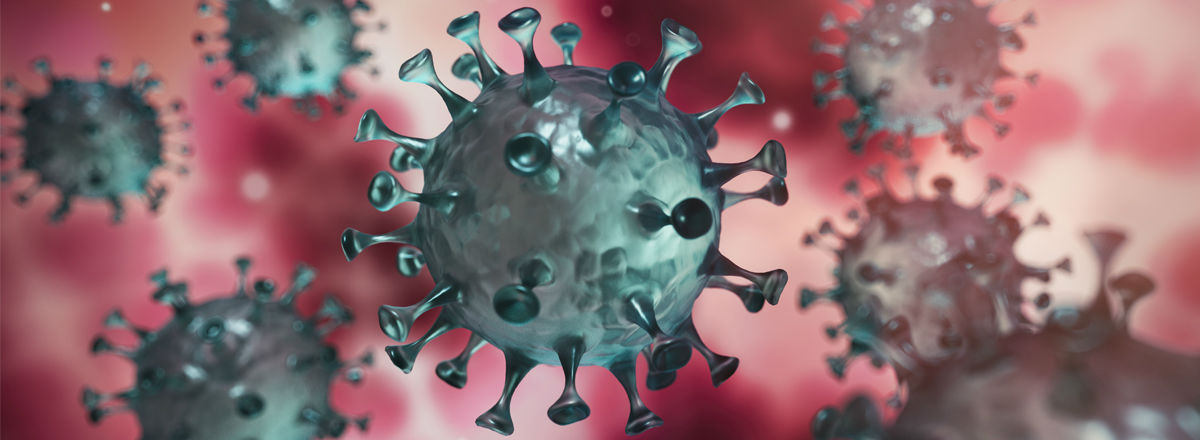

## General information about Covid19

Coronavirus disease 2019 (COVID-19) is a contagious disease caused by severe acute respiratory syndrome coronavirus 2. The first known case was identified in Wuhan, China, in December 2019.The disease has since spread worldwide, leading to an ongoing pandemic.

Symptoms of COVID‑19 are variable, but often include **fever, cough, headache, fatigue, breathing difficulties, loss of smell, and loss of taste**. Symptoms may begin one to fourteen days after exposure to the virus. At least a third of people who are infected do not develop noticeable symptoms. Of those people who develop symptoms noticeable enough to be classed as patients, most (81%) develop mild to moderate symptoms (up to mild pneumonia), while 14% develop severe symptoms (dyspnea, hypoxia, or more than 50% lung involvement on imaging), and 5% suffer critical symptoms (respiratory failure, shock, or multiorgan dysfunction).] Older people are at a higher risk of developing severe symptoms. Some people continue to experience a range of effects (long COVID) for months after recovery, and damage to organs has been observed. Multi-year studies are underway to further investigate the long-term effects of the disease.

# Our classification prediction:if the person is positive with corona


# Importing necessary libraries

In [97]:
import pandas as pd
import numpy as np
import matplotlib
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
warnings.filterwarnings('ignore')

# Basic info on the Data

In [156]:
#df = pd.read_csv("/Users/twmrgwzln/Downloads/corona_tested_individuals_ver_00225.csv")

In [99]:
df = pd.read_csv("C:\\Project\\corona_tested_individuals_ver_00225.csv")


### This dataset contains information about Covid19 taken from https://data.gov.il/dataset/covid-19.

The columns in the given dataset is as follows:

- **test_date:** the date the test were taken
- **cough:**if the person is coughing or not
- **fever:**if the person is having fever or not
- **sore_thorat:**if the person is having sore thoat or not
- **shortness_of_breath:**if the person having shortness of breathing or not
- **head_ache:** if the person is having head ache or not
- **corona_result:** the result of the corona test, postive or negative
- **age_60_and_above:** if the person is abobe 60 or not
- **gender:** whats is the gender, male or female
- **test_indication:** where the test had been taking

In [100]:
df

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2022-02-17,0,0,0,0,0,חיובי,No,נקבה,Other
1,2022-02-17,0,0,0,0,0,שלילי,No,נקבה,Other
2,2022-02-17,0,0,0,0,0,שלילי,No,נקבה,Other
3,2022-02-17,0,0,0,0,0,שלילי,No,NaN,Other
4,2022-02-17,0,0,0,0,0,שלילי,No,NaN,Other
...,...,...,...,...,...,...,...,...,...,...
9053443,2020-03-11,0,1,0,1,0,שלילי,NaN,NaN,Abroad
9053444,2020-03-11,0,0,0,0,0,שלילי,NaN,NaN,Other
9053445,2020-03-11,0,0,0,0,0,שלילי,NaN,NaN,Other
9053446,2020-03-11,0,0,0,0,0,שלילי,NaN,NaN,Other


### Just by looking at the data, we can see with have too much. <br>We will need to get rid of some of the data, we will do it later.

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9053448 entries, 0 to 9053447
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   test_date            object
 1   cough                int64 
 2   fever                int64 
 3   sore_throat          int64 
 4   shortness_of_breath  int64 
 5   head_ache            int64 
 6   corona_result        object
 7   age_60_and_above     object
 8   gender               object
 9   test_indication      object
dtypes: int64(5), object(5)
memory usage: 690.7+ MB


In [102]:
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2022-02-17,0,0,0,0,0,חיובי,No,נקבה,Other
1,2022-02-17,0,0,0,0,0,שלילי,No,נקבה,Other
2,2022-02-17,0,0,0,0,0,שלילי,No,נקבה,Other
3,2022-02-17,0,0,0,0,0,שלילי,No,NaN,Other
4,2022-02-17,0,0,0,0,0,שלילי,No,NaN,Other


### We will now change all the string data to int data in order to have the same type:
Female will be 0, male will be 1.
<br> Negative will be 0, positive will be 1.
<br> Under age 60 will be 0, Above will be 1
<br> And we will get rid of the "other" in corona result so it won't affect the data.

In [103]:
df.drop(df[df['corona_result'] == "אחר"].index, inplace = True)

In [104]:
df['gender'] = df['gender'].replace({"זכר": 1, "נקבה": 0})
df['corona_result'] = df['corona_result'].replace({"חיובי": 1, "שלילי": 0})
df['age_60_and_above'] = df['age_60_and_above'].replace({"Yes": 1, "No": 0})


### checking all the data share the same type:

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8858382 entries, 0 to 9053447
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   test_date            object 
 1   cough                int64  
 2   fever                int64  
 3   sore_throat          int64  
 4   shortness_of_breath  int64  
 5   head_ache            int64  
 6   corona_result        int64  
 7   age_60_and_above     float64
 8   gender               float64
 9   test_indication      object 
dtypes: float64(2), int64(6), object(2)
memory usage: 743.4+ MB


### We want want to predict the corona result column, so we first take a look at all the data about it

Postive with corona:

In [106]:
df[df['corona_result']==1].describe()


,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
count,908643.000000,908643.000000,908643.000000,908643.000000,908643.000000,908643.0,873113.000000,854545.000000
mean,0.142531,0.121596,0.065954,0.017223,0.127806,1.0,0.127039,0.483181
std,0.349594,0.326818,0.248203,0.130103,0.333874,0.0,0.333016,0.499717
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


negative with corona:

In [107]:
df[df['corona_result']==0].describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
count,7.949739e+06,7.949739e+06,7.949739e+06,7.949739e+06,7.949739e+06,7949739.0,6.109333e+06,6.485047e+06
mean,3.526871e-02,2.565342e-02,1.340597e-02,2.387500e-03,2.584274e-02,0.0,1.333741e-01,4.829492e-01
std,1.844582e-01,1.580991e-01,1.150055e-01,4.880369e-02,1.586660e-01,0.0,3.399787e-01,4.997092e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00


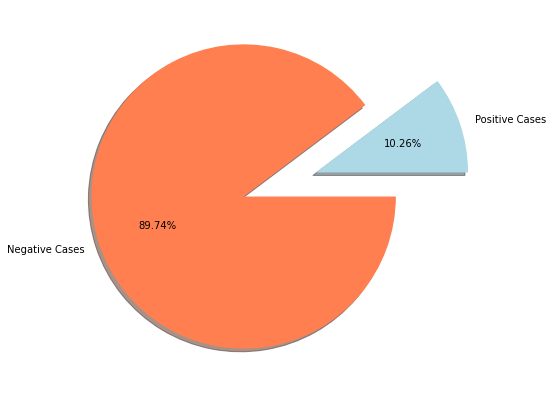

In [108]:
df_negative = df['corona_result'] == 0
df_positive = df['corona_result'] == 1

labels = 'Positive Cases', 'Negative Cases'
sizes = [df_positive.sum(), df_negative.sum()]
colors = ['lightblue', 'coral']
explode = (0.5, 0) 

fig, axs = plt.subplots(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=0)


plt.show()

### important information from the tables above:
- The majority of the cases are the negative results.

### Now we will clean all the NaN Data

In [109]:
df.isnull().sum()
df = df.dropna()

### Checking the size after cleaning all the NaN data

In [110]:
df.shape

(6207383, 10)

### After we cleaned around 3 milions rows of the data, we can still see we have alot of data. we will take a sample from the data that feature distributions are preserved.

In [158]:

sample_df = df.sample(int(len(df) * 0.002))

## info about the sample data

### size of the sample data

In [159]:
sample_df.shape

(12414, 10)

In [167]:
sample_df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
4228198,2021-02-16,0,0,0,0,0,0,0.0,0.0,Other
6896341,2020-09-30,1,0,0,0,0,1,0.0,1.0,Contact with confirmed
2398753,2021-08-17,0,0,0,0,0,0,0.0,1.0,Other
6301346,2020-11-13,0,0,0,0,0,0,0.0,1.0,Contact with confirmed
6613315,2020-10-19,0,0,0,0,0,0,1.0,1.0,Other


Corona result that equals to "other" is still irrelevant so we will drop it

In [112]:
sample_df.drop(sample_df[sample_df['corona_result'] == "אחר"].index, inplace = True)

### Changing all the types to int

In [113]:
sample_df['gender'] = sample_df['gender'].replace({"זכר": 1, "נקבה": 0})
sample_df['corona_result'] = sample_df['corona_result'].replace({"חיובי": 1, "שלילי": 0})
sample_df['age_60_and_above'] = sample_df['age_60_and_above'].replace({"Yes": 1, "No": 0})

In [114]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12414 entries, 2130338 to 1517040
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   test_date            12414 non-null  object 
 1   cough                12414 non-null  int64  
 2   fever                12414 non-null  int64  
 3   sore_throat          12414 non-null  int64  
 4   shortness_of_breath  12414 non-null  int64  
 5   head_ache            12414 non-null  int64  
 6   corona_result        12414 non-null  int64  
 7   age_60_and_above     12414 non-null  float64
 8   gender               12414 non-null  float64
 9   test_indication      12414 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


In [161]:
sample_df['gender'].value_counts()

0.0    6425
1.0    5989
Name: gender, dtype: int64

<AxesSubplot:>

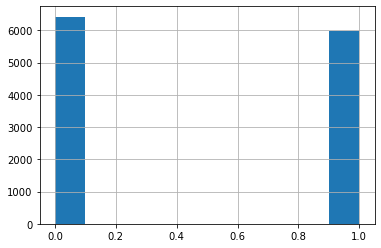

In [160]:
sample_df['gender'].hist()

In [116]:
cough_sample = sample_df['cough'] == 1
fever_sample = sample_df['fever'] == 1
sore_throat_sample = sample_df['sore_throat']== 1
shortness_of_breath_sample = sample_df['shortness_of_breath']==1
head_ache_sample = sample_df['head_ache']==1
corona_result_sample = sample_df['corona_result']==1
age_60_and_above_sample = sample_df['age_60_and_above']==1

cough_sample = cough_sample.sum()
fever_sample =fever_sample.sum()
sore_throat_sample=sore_throat_sample.sum()
shortness_of_breath_sample=shortness_of_breath_sample.sum()
head_ache_sample=head_ache_sample.sum()
corona_result_sample=corona_result_sample.sum()
age_60_and_above_sample=age_60_and_above_sample.sum()

In [117]:
Distribution_sample={'colums':['cough','fever','sore_throat','shortness_of_breath','head_ache', 'corona_result','age_60_and_above'],
                     'count':[cough_sample,fever_sample,sore_throat_sample,shortness_of_breath_sample,head_ache_sample,corona_result_sample,age_60_and_above_sample]}

Distribution_sample=pd.DataFrame(data=Distribution_sample,index=range(7))
Distribution_sample

,colums,count
0,cough,639
1,fever,477
2,sore_throat,256
3,shortness_of_breath,52
4,head_ache,528
5,corona_result,1600
6,age_60_and_above,1527


In [118]:
cough = df['cough'] == 1
fever = df['fever'] == 1
sore_throat = df['sore_throat']== 1
shortness_of_breath = df['shortness_of_breath']==1
head_ache = df['head_ache']==1
corona_result = df['corona_result']==1
age_60_and_above = df['age_60_and_above']==1

cough = cough.sum()
fever =fever.sum()
sore_throat=sore_throat.sum()
shortness_of_breath=shortness_of_breath.sum()
head_ache=head_ache.sum()
corona_result=corona_result.sum()
age_60_and_above=age_60_and_above.sum()

In [119]:
Distribution_orginal={'colums':['cough','fever','sore_throat','shortness_of_breath','head_ache','corona_result','age_60_and_above'],
                      'count':[cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above]}

Distribution_orginal=pd.DataFrame(data=Distribution_orginal,index=range(7))
Distribution_orginal

,colums,count
0,cough,312000
1,fever,242341
2,sore_throat,132744
3,shortness_of_breath,26675
4,head_ache,258328
5,corona_result,826347
6,age_60_and_above,809527


## Now we will check the distribtuion of the parameters stays the same like the original data frame

Text(0.5, 1.0, 'Distribution_sample')

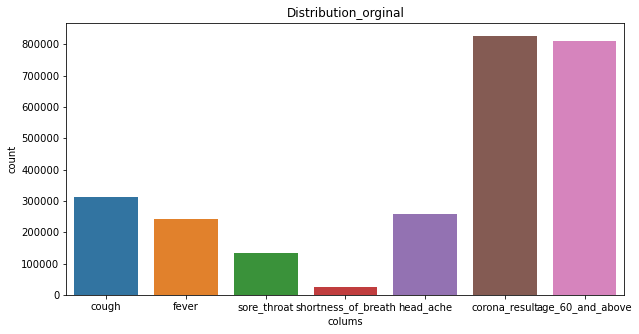

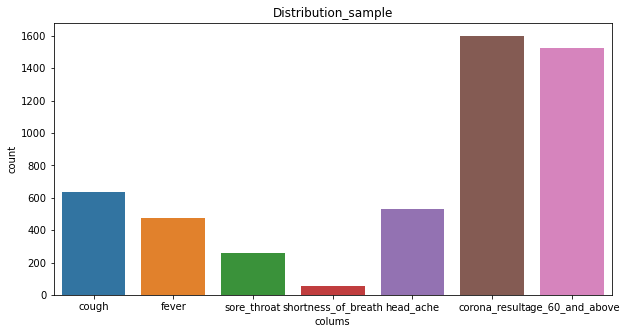

In [120]:
fig = plt.figure(figsize=(10,5))
sns.barplot('colums','count',data=Distribution_orginal).set_title('Distribution_orginal')

fig = plt.figure(figsize=(10,5))
sns.barplot('colums','count',data=Distribution_sample).set_title('Distribution_sample')

### From the table above we can infer that the ration stays the same

In [121]:
sample_df[sample_df['corona_result']==1].describe()


,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
count,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.0,1600.00000,1600.000000
mean,0.140000,0.113750,0.063750,0.01500,0.122500,1.0,0.12125,0.467500
std,0.347096,0.317607,0.244383,0.12159,0.327965,0.0,0.32652,0.499099
min,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,0.00000,0.000000
75%,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,0.00000,1.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.0,1.00000,1.000000


## We can now see the percentage between postive and negative case stays roughly the same

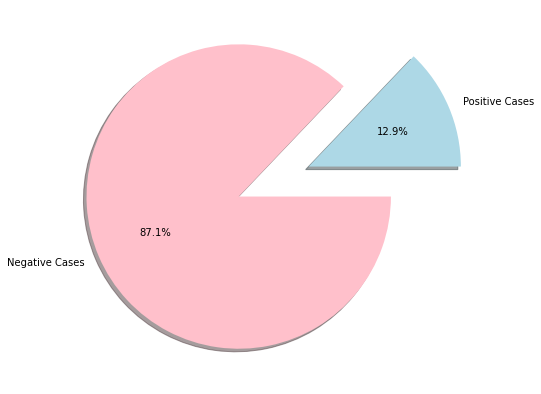

In [124]:
sample_df_negative = sample_df['corona_result'] == 0
sample_df_positive = sample_df['corona_result'] == 1

labels = 'Positive Cases', 'Negative Cases'
sizes = [sample_df_positive.sum(), sample_df_negative.sum()]
colors = ['lightblue', 'pink']
explode = (0.5, 0) 

fig, axs = plt.subplots(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)


plt.show()

## Showing the connection between sympytonms and corona reslut

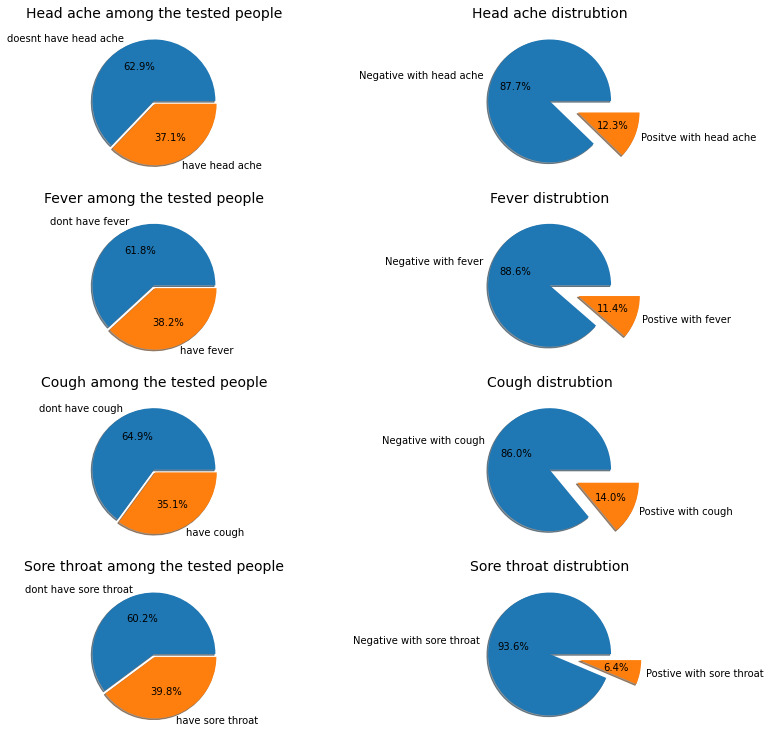

In [125]:
fig, ax = plt.subplots(4,2 ,figsize = (13,13))
((ax1, ax2) , (ax3, ax4),(ax5, ax6) , (ax7, ax8)) = ax
labels = ["doesnt have head ache ", "have head ache"]
values = sample_df[(sample_df['head_ache']==1)]['corona_result'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.05])
ax1.set_title("Head ache among the tested people", fontdict={'fontsize': 14})

labels = ["Negative with head ache ", "Positve with head ache"]
values = sample_df[(sample_df['corona_result']==1)]['head_ache'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.5])
ax2.set_title("Head ache distrubtion", fontdict={'fontsize': 14})

labels = ["dont have fever", "have fever"]
values = sample_df[(sample_df['fever']==1)]['corona_result'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.05])
ax3.set_title("Fever among the tested people", fontdict={'fontsize': 14})

labels = ["Negative with fever ", "Postive with fever"]
values = sample_df[(sample_df['corona_result']==1)]['fever'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.5])
ax4.set_title("Fever distrubtion", fontdict={'fontsize': 14})

labels = ["dont have cough", "have cough"]
values = sample_df[(sample_df['cough']==1)]['corona_result'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.05])
ax5.set_title("Cough among the tested people", fontdict={'fontsize': 14})

labels = ["Negative with cough ", "Postive with cough"]
values = sample_df[(sample_df['corona_result']==1)]['cough'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.5])
ax6.set_title("Cough distrubtion", fontdict={'fontsize': 14})

labels = ["dont have sore throat", "have sore throat"]
values = sample_df[(sample_df['sore_throat']==1)]['corona_result'].value_counts().tolist()
ax7.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.05])
ax7.set_title("Sore throat among the tested people", fontdict={'fontsize': 14})

labels = ["Negative with sore throat ", "Postive with sore throat"]
values = sample_df[(sample_df['corona_result']==1)]['sore_throat'].value_counts().tolist()
ax8.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.5])
ax8.set_title("Sore throat distrubtion", fontdict={'fontsize': 14})


plt.show()

# Checking for correlations in our dataset

We want to see more cleary if there is a correlation between all the parameters

In [126]:
sample_df.corr()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
cough,1.000000,0.344131,0.307375,0.159875,0.364598,0.154105,0.043731,-0.033669
fever,0.344131,1.000000,0.201004,0.123298,0.335824,0.150735,0.018279,0.007315
sore_throat,0.307375,0.201004,1.000000,0.148563,0.300859,0.116731,0.025042,-0.012088
shortness_of_breath,0.159875,0.123298,0.148563,1.000000,0.140845,0.064388,0.017482,-0.023260
head_ache,0.364598,0.335824,0.300859,0.140845,1.000000,0.152425,-0.008443,-0.028040
corona_result,0.154105,0.150735,0.116731,0.064388,0.152425,1.000000,-0.002057,-0.014968
age_60_and_above,0.043731,0.018279,0.025042,0.017482,-0.008443,-0.002057,1.000000,-0.025797
gender,-0.033669,0.007315,-0.012088,-0.023260,-0.028040,-0.014968,-0.025797,1.000000


<AxesSubplot:>

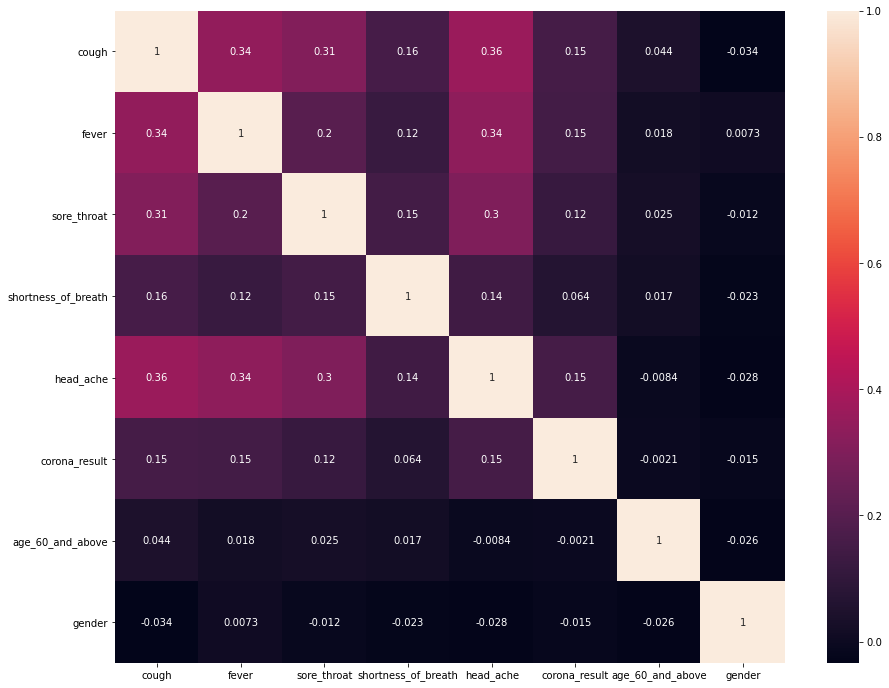

In [127]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(sample_df[['cough', 'fever', 'sore_throat', 'shortness_of_breath' ,'head_ache','corona_result','age_60_and_above', 'gender']].corr(),annot=True)

### Conclusion
Using the hot map we noticed that there is no correlation between the following parameters:
- Gender
- Over the age of 60
- Indication for testing
- test date

So we decided to delete them.

In [128]:
sample_df.drop(['age_60_and_above','gender' , 'test_indication','test_date'], axis=1, inplace=True)


## Among the variables that have a correlation we will put them in a pie chart

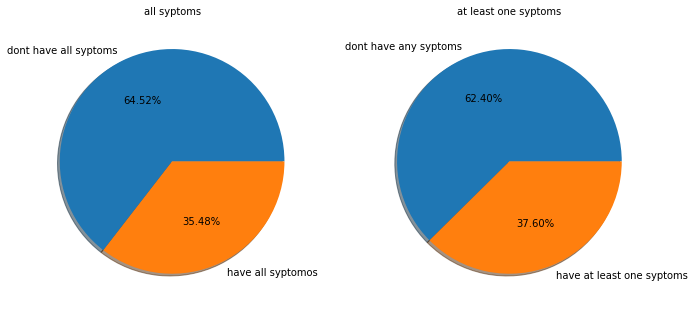

In [168]:
fig, ax = plt.subplots(1,2,figsize = (10,10))
((ax1, ax2)) = ax
labels = ["dont have all syptoms", "have all syptomos"]
values = sample_df[(sample_df['fever']==1) & (sample_df['cough']==1)&(sample_df['head_ache']==1)&(sample_df['sore_throat']==1)]['corona_result'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("all syptoms", fontdict={'fontsize': 10})

labels = ["dont have any syptoms", "have at least one syptoms"]
values = sample_df[(sample_df['fever']==1) | (sample_df['cough']==1) | (sample_df['head_ache']==1) | (sample_df['sore_throat']==1)]['corona_result'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("at least one syptoms", fontdict={'fontsize': 10})
plt.tight_layout()


plt.show()

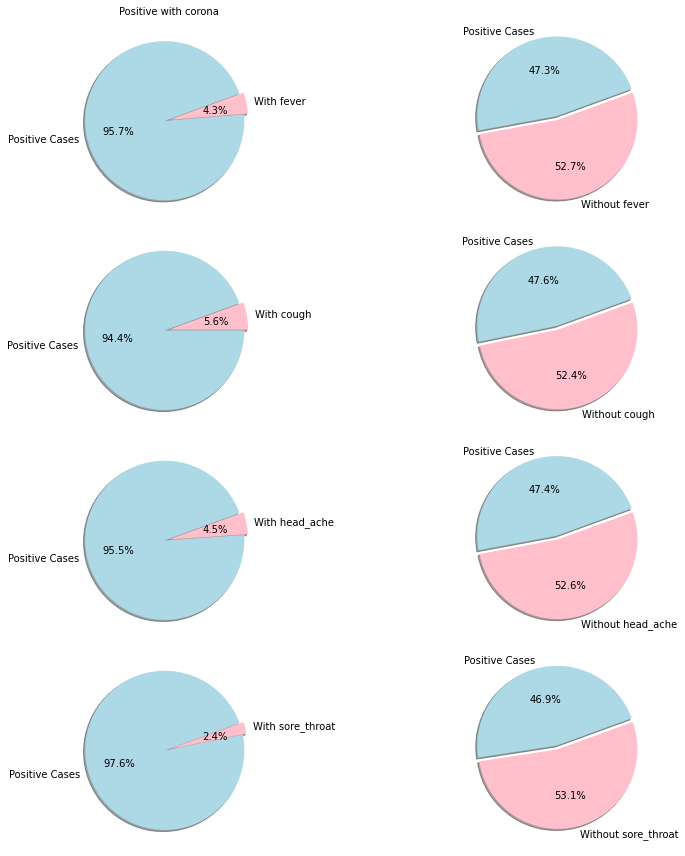

In [173]:
fig, ax = plt.subplots(4,2 ,figsize = (12,12))
((ax1, ax5) , (ax2, ax6),(ax3, ax7) , (ax4, ax8)) = ax

sample_df_fever = sample_df['fever'] == 1
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'With fever'
sizes = [sample_df_positive.sum(), sample_df_fever.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 
ax1.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)
ax1.set_title("Positive with corona", fontdict={'fontsize': 10})

sample_df_cough = sample_df['cough'] == 1
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'With cough'
sizes = [sample_df_positive.sum(), sample_df_cough.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 
ax2.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

sample_df_head_ache = sample_df['head_ache'] == 1
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'With head_ache'
sizes = [sample_df_positive.sum(), sample_df_head_ache.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 
ax3.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

sample_df_sore_throat = sample_df['sore_throat'] == 1
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'With sore_throat'
sizes = [sample_df_positive.sum(), sample_df_sore_throat.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 
ax4.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

sample_df_fever = sample_df['fever'] == 0
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'Without fever'
sizes = [sample_df_positive.sum(), sample_df_fever.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 
ax5.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

sample_df_cough = sample_df['cough'] == 0
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'Without cough'
sizes = [sample_df_positive.sum(), sample_df_cough.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 
ax6.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

sample_df_head_ache = sample_df['head_ache'] == 0
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'Without head_ache'
sizes = [sample_df_positive.sum(), sample_df_head_ache.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 
ax7.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

sample_df_sore_throat = sample_df['sore_throat'] == 0
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'Without sore_throat'
sizes = [sample_df_positive.sum(), sample_df_sore_throat.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 
ax8.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

plt.tight_layout()
plt.show()


In [131]:
sample_df['at1_symptoms'] = np.where((sample_df['fever']==1) | (sample_df['cough']==1)|(sample_df['head_ache']==1)|(sample_df['sore_throat']==1), 1, 0)

In [132]:
sample_df['all_symptoms'] = np.where((sample_df['fever']==1) & (sample_df['cough']==1)&(sample_df['head_ache']==1)&(sample_df['sore_throat']==1), 1, 0)

## We take the parameters that are the most correlated

<AxesSubplot:>

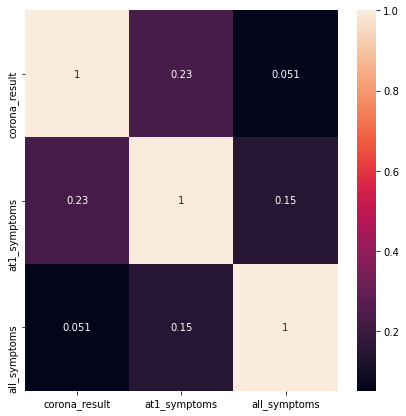

In [133]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(sample_df[['corona_result','at1_symptoms','all_symptoms']].corr(),annot=True)

#  Splitting our train set into x test y test

In [134]:
X = sample_df.drop(columns=['corona_result'])
Y = sample_df['corona_result']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 78)

In [135]:
print(X_test.shape)
print(X_train.shape)

(2483, 7)
(9931, 7)


### We figured out that the data is imbalanced so we decied to add Synthetic data to help the model

In [137]:
from sklearn.utils import resample
df_1 = sample_df[sample_df.corona_result==1]
df_2 = sample_df[sample_df.corona_result==0] 
df_1_upsampled = resample(df_1, 
                                 replace=True,     
                                 n_samples=10721,    
                                 random_state=1) 
df_upsampled = pd.concat([df_1_upsampled, df_2])
df_upsampled.corona_result.value_counts()

0    10814
1    10721
Name: corona_result, dtype: int64

In [174]:
X = df_upsampled.drop(columns=['corona_result'])
Y =df_upsampled['corona_result']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state = 7)

In [175]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, Y)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X)
dummy_clf.score(X, Y)

0.502159275597864

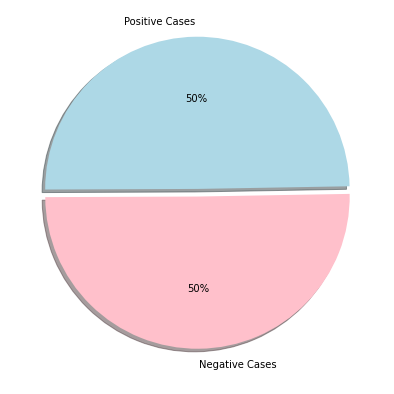

In [140]:
sample_df_negative = df_upsampled['corona_result'] == 0
sample_df_positive = df_upsampled['corona_result'] == 1

labels = 'Positive Cases', 'Negative Cases'
sizes = [sample_df_positive.sum(), sample_df_negative.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 

fig, axs = plt.subplots(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.f%%', shadow=True, startangle=1)


plt.show()

# Evaluating each model's accuracy rate:

# Model #1 : KNN - K-Nearest Neighbors

In [141]:
model = KNeighborsClassifier(n_jobs=-1)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
confusion_matrix=metrics.confusion_matrix(prediction,y_test)

Accuracy: 0.6041473228102755


Text(0, 0.5, 'Testing Accuracy')

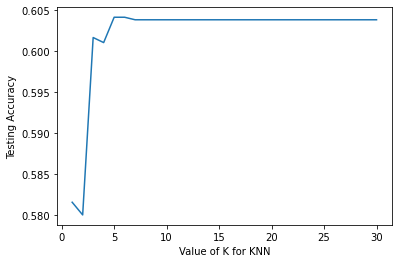

In [142]:
k_range = list(range(1, 31))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    prediction = knn.predict(X_test)
    scores.append(metrics.accuracy_score(prediction, y_test))
    
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [176]:
best_k = KNeighborsClassifier(n_neighbors=25, metric='euclidean', weights='distance')
best_model.fit(X_train,y_train)
prediction=best_model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))

NameError: name 'best_model' is not defined

## Confusion Matrix - KNN

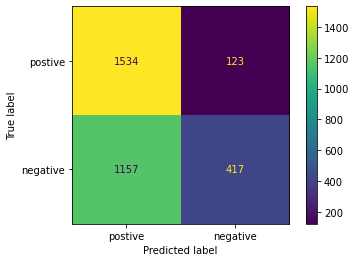

In [154]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, prediction)
cmd = ConfusionMatrixDisplay(cm, display_labels=['postive','negative'])
cmd.plot()

KNeighborsClassifier auc is 0.615


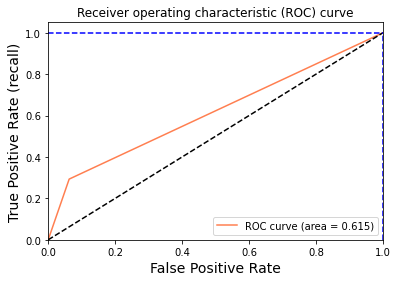

In [147]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
print(knn.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")

plt.show()

In [148]:
knn_prec = precision_score(prediction,y_test)
print('precision:',knn_prec)

knn_recall = recall_score(prediction,y_test)
print('recall:',knn_recall)

knn_f1 = f1_score(prediction,y_test)
print('f1:',knn_f1)

knn_acc = accuracy_score(prediction,y_test)
print('accuracy:',knn_acc)

precision: 0.26493011435832275
recall: 0.7722222222222223
f1: 0.3945127719962157
accuracy: 0.6038378211080161


# Model #2 : LogisticRegression

In [149]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
confusion_matrix=metrics.confusion_matrix(prediction,y_test)

Accuracy: 0.6038378211080161


## Confusion Matrix - LogisticRegression

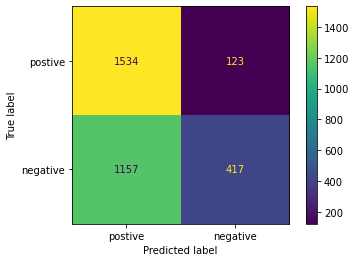

In [155]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['postive','negative'])
cmd.plot()

LogisticRegression auc is 0.595


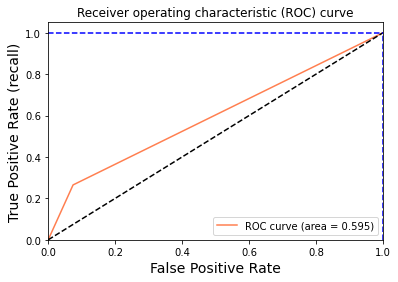

In [151]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred)
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))
idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")

plt.show()

# Model #3 : DesicionTree


In [152]:
dTree = DecisionTreeClassifier()
dTree.fit(X_train,y_train)
dTree_predict = cross_val_predict(dTree, X_train, y_train, cv = 5)

dTree_prec = precision_score(y_train , dTree_predict)
print('precision:',dTree_prec)

dTree_recall = recall_score(y_train , dTree_predict)
print('recall:',dTree_recall)

dTree_f1 = f1_score(y_train , dTree_predict)
print('f1:',dTree_f1)

dTree_acc = accuracy_score(y_train , dTree_predict)
print('accuracy:',dTree_acc)

precision: 0.8022013596633215
recall: 0.2709084945883896
f1: 0.4050343249427917
accuracy: 0.6022727272727273


# Model #4 : RandomForest

In [153]:
randomForest = RandomForestClassifier()
randomForest.fit(X_train,y_train)
randomForest_predict = cross_val_predict(randomForest, X_train, y_train, cv = 5)


randomForest_prec = precision_score(y_train , randomForest_predict)
print('precision:',dTree_prec)

randomForest_recall = recall_score(y_train , randomForest_predict)
print('recall:',dTree_recall)

randomForest_f1 = f1_score(y_train , randomForest_predict)
print('f1:',dTree_f1)

randomForest_acc = accuracy_score(y_train , randomForest_predict)
print('accuracy:',dTree_acc)

precision: 0.8022013596633215
recall: 0.2709084945883896
f1: 0.4050343249427917
accuracy: 0.6022727272727273


### Comparing our model to a dummy model


In [177]:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X, Y)
DummyClassifier(strategy='stratified')
dummy_clf.predict(X)
dummy_clf.score(X, Y)


0.4975156721615974